# Import Data

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import nltk
import string
import re
import seaborn as sns
from sklearn.metrics import classification_report
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load data csv
Data = pd.read_csv("drive/MyDrive/Colab Notebooks/u17_all_labeled.csv")

In [ ]:
#mengambil data berdasarkan kolom yang dibutuhkan
pelabelan = pd.DataFrame(Data[['tweet', 'Sentiment']])
pelabelan.head()

,tweet,Sentiment
0,Radja Nainggolan Beri Semangat Para Pemain Tim...,Positif
1,Piala Dunia U ternyata seru banget Iran kalahk...,Positif
2,Penampilan gugup Timnas Indonesia U dalam laga...,Negatif
3,Lolos fase berikutnya PERSEBAYA U Piala Soeratin,Negatif
4,Jadwal Piala Dunia U hari ini,Negatif


In [ ]:
pelabelan = pelabelan.dropna()

In [ ]:
#melihat informasi data
pelabelan.isnull().sum().sum()

0

In [ ]:
pelabelan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      2356 non-null   object
 1   Sentiment  2356 non-null   object
dtypes: object(2)
memory usage: 36.9+ KB


# Text Processing

##Case Folding

In [ ]:
def case_folding(pelabelan, text_field):
  #membuat menjadi huruf kecil
  pelabelan[text_field] = pelabelan[text_field].str.lower()
  return pelabelan

In [ ]:
casefold = case_folding(pelabelan, 'tweet') #memasukan fungsi case_fold ke variabel casefold
casefold

,tweet,Sentiment
0,radja nainggolan beri semangat para pemain tim...,Positif
1,piala dunia u ternyata seru banget iran kalahk...,Positif
2,penampilan gugup timnas indonesia u dalam laga...,Negatif
3,lolos fase berikutnya persebaya u piala soeratin,Negatif
4,jadwal piala dunia u hari ini,Negatif
...,...,...
2351,dito ariotedjo menyampaikan penyelenggaraan pi...,Positif
2352,karier peraih sepatu emas piala dunia u yang ...,Positif
2353,electrizen pln berkomitmen untuk menyukseskan ...,Positif
2354,apresiasi yang layak diberikan untuk indonesi...,Positif


##Stopword

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
casefold['stopword'] = casefold['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
stopword = casefold
stopword.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,Sentiment,stopword
0,radja nainggolan beri semangat para pemain tim...,Positif,radja nainggolan semangat pemain timnas u pial...
1,piala dunia u ternyata seru banget iran kalahk...,Positif,piala dunia u seru banget iran kalahkan brazil...


##Tokenizing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
stopword['tokenizing'] = stopword['stopword'].apply(lambda x: word_tokenize(x))
tokenizing = stopword
tokenizing.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tweet,Sentiment,stopword,tokenizing
0,radja nainggolan beri semangat para pemain tim...,Positif,radja nainggolan semangat pemain timnas u pial...,"[radja, nainggolan, semangat, pemain, timnas, ..."
1,piala dunia u ternyata seru banget iran kalahk...,Positif,piala dunia u seru banget iran kalahkan brazil...,"[piala, dunia, u, seru, banget, iran, kalahkan..."
2,penampilan gugup timnas indonesia u dalam laga...,Negatif,penampilan gugup timnas indonesia u laga debut...,"[penampilan, gugup, timnas, indonesia, u, laga..."
3,lolos fase berikutnya persebaya u piala soeratin,Negatif,lolos fase persebaya u piala soeratin,"[lolos, fase, persebaya, u, piala, soeratin]"
4,jadwal piala dunia u hari ini,Negatif,jadwal piala dunia u,"[jadwal, piala, dunia, u]"


##Stemming

In [ ]:
!pip install Sastrawi #instal modul sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in tokenizing['tokenizing']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
tokenizing['stemming'] = tokenizing['tokenizing'].apply(lambda x:' '.join(get_stemmed_term(x)))
stemming = tokenizing
stemming.head()

4687
------------------------
1 : radja : radja
2 : nainggolan : nainggolan
3 : semangat : semangat
4 : pemain : main
5 : timnas : timnas
6 : u : u
7 : pialaduniau : pialaduniau
8 : radjanainggolan : radjanainggolan
9 : timnasday : timnasday
10 : piala : piala
11 : dunia : dunia
12 : seru : seru
13 : banget : banget
14 : iran : iran
15 : kalahkan : kalah
16 : brazil : brazil
17 : ketinggalan : tinggal
18 : indonesia : indonesia
19 : draw : draw
20 : dg : dg
21 : ekuador : ekuador
22 : terpaksa : paksa
23 : nonton : nonton
24 : penampilan : tampil
25 : gugup : gugup
26 : laga : laga
27 : debut : debut
28 : membangkitkan : bangkit
29 : memori : memori
30 : mundari : mundari
31 : karya : karya
32 : lolos : lolos
33 : fase : fase
34 : persebaya : baya
35 : soeratin : soeratin
36 : jadwal : jadwal
37 : anjir : anjir
38 : argentina : argentina
39 : aja : aja
40 : udah : udah
41 : tatoan : tato
42 : full : full
43 : selengan : leng
44 : nih : nih
45 : stadion : stadion
46 : mateng : mateng
47

,tweet,Sentiment,stopword,tokenizing,stemming
0,radja nainggolan beri semangat para pemain tim...,Positif,radja nainggolan semangat pemain timnas u pial...,"[radja, nainggolan, semangat, pemain, timnas, ...",radja nainggolan semangat main timnas u pialad...
1,piala dunia u ternyata seru banget iran kalahk...,Positif,piala dunia u seru banget iran kalahkan brazil...,"[piala, dunia, u, seru, banget, iran, kalahkan...",piala dunia u seru banget iran kalah brazil ti...
2,penampilan gugup timnas indonesia u dalam laga...,Negatif,penampilan gugup timnas indonesia u laga debut...,"[penampilan, gugup, timnas, indonesia, u, laga...",tampil gugup timnas indonesia u laga debut pia...
3,lolos fase berikutnya persebaya u piala soeratin,Negatif,lolos fase persebaya u piala soeratin,"[lolos, fase, persebaya, u, piala, soeratin]",lolos fase baya u piala soeratin
4,jadwal piala dunia u hari ini,Negatif,jadwal piala dunia u,"[jadwal, piala, dunia, u]",jadwal piala dunia u


In [ ]:
stemming.to_csv("textprocessing.csv")

#Membagi data Train dan Test

In [ ]:
# Menentukan fitur (X) dan target (y)
X = stemming['stemming']
y = stemming['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() #memanggil fungsi
vectorizer.fit(X)
X_scaled = vectorizer.transform(X)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Melakukan random oversampling
X_over, y_over = ros.fit_resample(X_scaled, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(pd.Series(y_over).value_counts())

Jumlah sampel setelah oversampling:
Sentiment
Positif    1283
Negatif    1283
Name: count, dtype: int64


In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 10
from sklearn.model_selection import train_test_split
traintest = stemming
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,
                                                    test_size = 0.20,random_state = 10)

#TF IDF

In [ ]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(stemming['stemming'])

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
aaaaa : 7.6665326142680215
aamiin : 8.071997722376185
aappnym : 8.071997722376185
abakiri : 8.071997722376185
abal : 8.071997722376185
abang : 7.378850541816241
abangan : 8.071997722376185
abdulboriev : 8.071997722376185
abdullayev : 8.071997722376185
abg : 8.071997722376185
abidine : 8.071997722376185
abis : 6.367249630137761
abolfazl : 8.071997722376185
abraev : 8.071997722376185
abrik : 8.071997722376185
absen : 8.071997722376185
ac : 8.071997722376185
academie : 7.6665326142680215
academy : 7.6665326142680215
acara : 6.126087573320873
aceh : 6.973385433708076
acmilan : 7.378850541816241
acung : 7.378850541816241
ad : 7.155706990502031
ada : 7.378850541816241
adadikompas : 5.507048364914649
add : 8.071997722376185
ade : 8.071997722376185
adek : 6.685703361256295
adik : 6.685703361256295
adikadik : 7.155706990502031
adirafestival : 7.6665326142680215
adit : 8.071997722376185
adu : 6.367249630137761
aduk : 8.071997722376185
ae : 8.071997722376185
afc : 7.155706990502031
a

In [ ]:
# get indexing
word_index = tfidf.vocabulary_
word_index = pd.DataFrame.from_dict(word_index, orient='index',
                       columns=['Jumlah'])
word_index.reset_index(inplace=True)
word_index.rename(columns = {"index": "Kata"}, inplace=True)
word_index

,Kata,Jumlah
0,radja,2912
1,nainggolan,2315
2,semangat,3155
3,main,2054
4,timnas,3583
...,...,...
3964,golkarprabowo,1201
3965,gibranmasukgolkar,1159
3966,ditoariotedjo,825
3967,sepatu,3180


In [ ]:
kata = word_index.sort_values(by='Kata').reset_index(drop=True)
kata

,Kata,Jumlah
0,aaaaa,0
1,aamiin,1
2,aappnym,2
3,abakiri,3
4,abal,4
...,...,...
3964,zone,3964
3965,zonk,3965
3966,zoom,3966
3967,zuberbuhler,3967


In [ ]:
top10 = word_index.sort_values(by='Jumlah', ascending=False).reset_index(drop=True)
top10.head(10)

,Kata,Jumlah
0,zzzzzzz,3968
1,zuberbuhler,3967
2,zoom,3966
3,zonk,3965
4,zone,3964
5,zonauang,3963
6,zonajajan,3962
7,zonaintegritaspolresgarut,3961
8,zona,3960
9,zionis,3959


In [ ]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 2912)	0.40688039965061645
  (0, 2315)	0.42409773997442096
  (0, 3155)	0.32395212454966105
  (0, 2054)	0.22065790002078953
  (0, 3583)	0.17342087552283372
  (0, 2720)	0.22849821527834296
  (0, 2913)	0.5031070118916848
  (0, 3585)	0.40688039965061645
  (1, 2717)	0.07962749925845307
  (1, 893)	0.07951620178366356
  (1, 3205)	0.2735365089446548
  (1, 307)	0.24968006525391884
  (1, 1440)	0.23820503430255668
  (1, 1601)	0.2093551850917213
  (1, 509)	0.25755676337646327
  (1, 3600)	0.28832792019818687
  (1, 1396)	0.12972386457662632
  (1, 873)	0.42838355418703405
  (1, 781)	0.36189901449120704
  (1, 921)	0.28292627938474146
  (1, 2565)	0.3797557059282588
  (1, 2438)	0.2110953516929999
  (2, 3583)	0.12767563667216258
  (2, 2717)	0.1449804200593196
  (2, 893)	0.14477777706793105
  :	:
  (2353, 265)	0.20133756164642364
  (2353, 2092)	0.15037624279918385
  (2353, 1023)	0.10347320333209406
  (2353, 3374)	0.12450841690446543
  (2353, 144)	0.21972967192124984
  (2353, 1991)	0.38

In [ ]:
# Melihat kata pada index 0
indices_to_view = [3585, 2913, 2720, 3583, 2054, 3155, 2315, 2912]
rows = kata.iloc[indices_to_view]
rows

,Kata,Jumlah
3585,timnasday,3585
2913,radjanainggolan,2913
2720,pialaduniau,2720
3583,timnas,3583
2054,main,2054
3155,semangat,3155
2315,nainggolan,2315
2912,radja,2912


In [ ]:
feature_names = tfidf.get_feature_names_out()
corpus = stemming['stemming']
tfs = tfidf.fit_transform(stemming['stemming'])
corpus_index = [n for n in corpus]
import pandas as pd
df = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
print(df)

             radja nainggolan semangat main timnas u pialaduniau radjanainggolan timnasday  \
aaaaa                                                      0.0                               
aamiin                                                     0.0                               
aappnym                                                    0.0                               
abakiri                                                    0.0                               
abal                                                       0.0                               
...                                                        ...                               
zone                                                       0.0                               
zonk                                                       0.0                               
zoom                                                       0.0                               
zuberbuhler                                                0

In [ ]:
df['radja nainggolan semangat main timnas u pialaduniau radjanainggolan timnasday']

,radja nainggolan semangat main timnas u pialaduniau radjanainggolan timnasday
aaaaa,0.0
aamiin,0.0
aappnym,0.0
abakiri,0.0
abal,0.0
...,...
zone,0.0
zonk,0.0
zoom,0.0
zuberbuhler,0.0


#Support Vector Machine

In [ ]:
from sklearn.svm import SVC #import library
clf = SVC(kernel='linear')
# mentrain data
clf.fit(X_train, y_train)
# memprediksi nilai x, menggunakan model
y_preds = clf.predict(X_test)

#Confusion Matrix

In [ ]:
from sklearn import metrics #import library
from sklearn.metrics import confusion_matrix #import library
from sklearn.metrics import classification_report #import library
print("===============================================")
print(f"Accuracy : ",metrics.accuracy_score(y_test, y_preds)) # memanggil fungsi menghitung akurasi
print("===========classification_report===============")
print(classification_report(y_test, y_preds)) # memanggil fungsi report klasifikasi
print("===============================================")

Accuracy :  0.8482490272373541
===========classification_report===============
              precision    recall  f1-score   support

     Negatif       0.81      0.89      0.85       247
     Positif       0.89      0.81      0.85       267

    accuracy                           0.85       514
   macro avg       0.85      0.85      0.85       514
weighted avg       0.85      0.85      0.85       514



In [ ]:
cf_matrix = confusion_matrix(y_test, y_preds)
cf_matrix

array([[220,  27],
       [ 51, 216]])

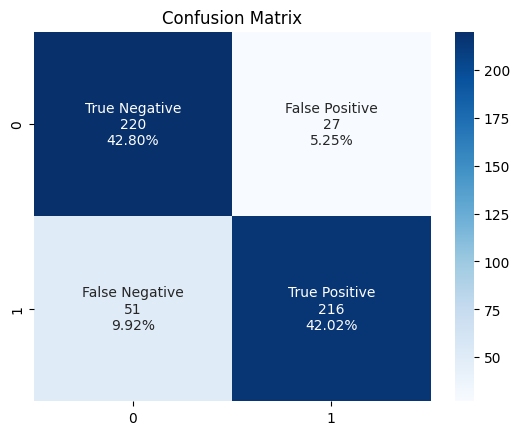

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(title="Confusion Matrix")
plt.savefig("%s.png"%'Confusion Matrix') #menyimpan kedalam png

#Word Clouds

In [ ]:
!pip install wordcloud

<Figure size 640x480 with 0 Axes>

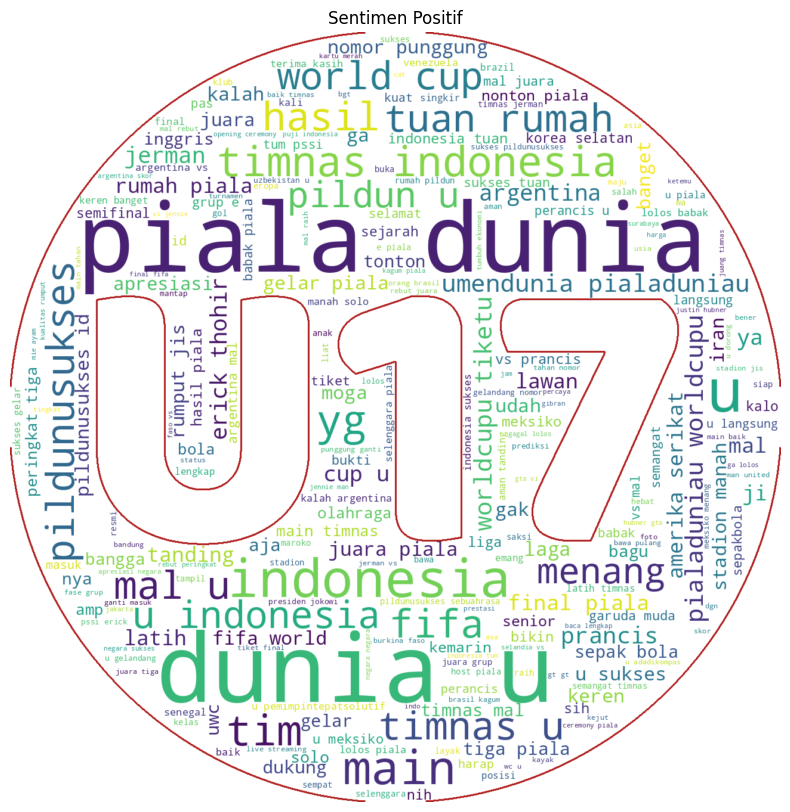

In [ ]:
# Create a word cloud image
mask = np.array(Image.open("drive/MyDrive/Colab Notebooks/U17.png"))
positive_word = ' '.join(stemming[stemming.Sentiment == 'Positif']['stemming']) #mengambil data text_steamindo berdasarkan label positif

wc = WordCloud(background_color='White', max_words=250, mask=mask,
                contour_width=3,contour_color='firebrick')

# Generate a wordcloud
wc.generate(positive_word)

plt.savefig("%s.png"%'positive-word') #menyimpan kedalam png

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Sentimen Positif")
plt.show()


<Figure size 640x480 with 0 Axes>

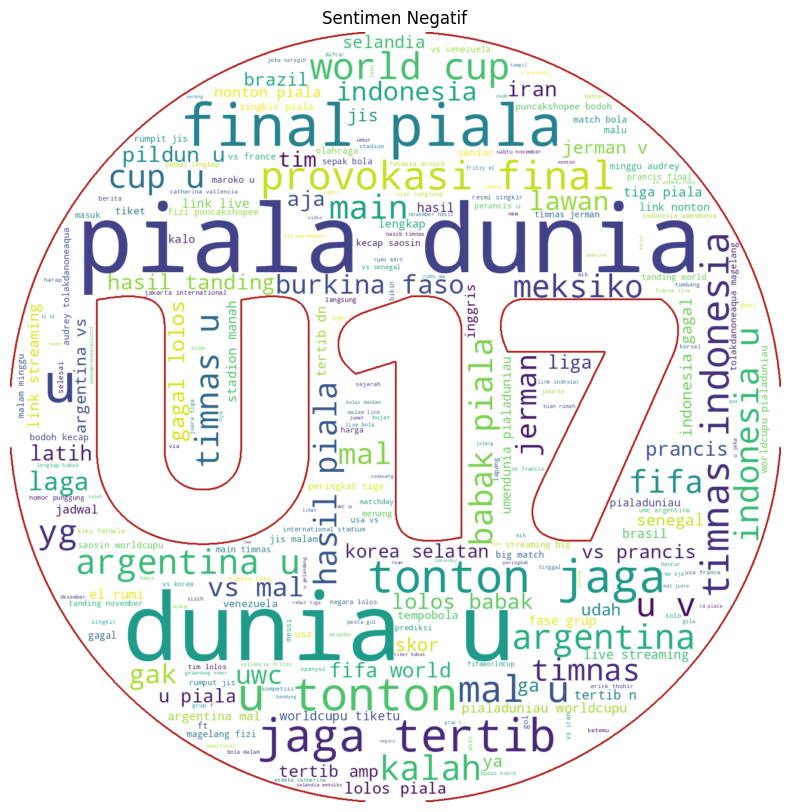

In [ ]:
# Create a word cloud image
mask = np.array(Image.open("drive/MyDrive/Colab Notebooks/U17.png"))
negatif_word = ' '.join(stemming[stemming.Sentiment == 'Negatif']['stemming']) #mengambil data text_steamindo berdasarkan label positif

wc = WordCloud(background_color="white", max_words=250, mask=mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(negatif_word)

plt.savefig("%s.png"%'negative-word') #menyimpan kedalam png

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Sentimen Negatif")
plt.show()